<a href="https://colab.research.google.com/github/YuLim2/BSSM_Data/blob/master/urllib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


공공데이터 포털 사이트에서 한국환경공단_에어코리아_미세먼지 경보 발령 현황 자료를 수집하여 분석하시오.


---

In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155225 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

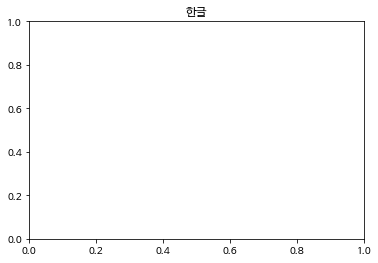

In [ ]:
plt.title('한글')
plt.show()

#urllib 모듈
+ URL과 웹 요청에 관련된 모듈들 패키지로 묶어 제공

## urllib.request 모듈
* 웹 페이지 요청 및 데이터를 가져올 수 있음

### urllib.request.urlopen(url, data)
* 웹 서버에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘**응답 객체(HTTPResponse)**’를 반환
* data는 서버로 전송할 추가 데이터를 지정하는 객체
* 반환된 응답 객체:  read() 메서드를 실행
   - 웹 서버가 응답한 데이터를 바이트 배열로 읽어들임
   - 읽어들인 바이트 배열 : 이진수로 이루어진 수열이어서 **텍스트 형식의 데이터를 decode('utf-8') 메서드를 실행하여 문자열로 변환**

* 참고) **Byte 데이터**
  + 1바이트(0~255사이 코드)로 표현되는 문자 표현
  + 문자열에서 사용하는 연산을 거의 제공
    - 인덱싱/슬라이싱, in, Upper(), Split()
  + 지원 메소드
    - **decode(인코딩값)** : 바이트->문자열로 변환  
    - **encode()** : 문자열->바이트로 변환  


### urllib.request.Request(url, headers={})
* POST방식으로 데이터를 보내려고 할 경우 
  + URL : 요청 주소
  * headers : 딕셔너리형태의 헤더

In [ ]:
from urllib.request import Request, urlopen
import json  

In [ ]:
url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=20120101'

In [ ]:
# 요청
resp = urlopen(url)
resp

In [ ]:
# 객체 내용 확인
#rsp = urlopen(url).read().decode('utf-8')
rsp = resp.read().decode('utf-8')
rsp

'{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20120101~20120101","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20112207","movieNm":"미션임파서블:고스트프로토콜","openDt":"2011-12-15","salesAmt":"2776060500","salesShare":"36.3","salesInten":"-415699000","salesChange":"-13","salesAcc":"40541108500","audiCnt":"353274","audiInten":"-60106","audiChange":"-14.5","audiAcc":"5328435","scrnCnt":"697","showCnt":"3223"},{"rnum":"2","rank":"2","rankInten":"1","rankOldAndNew":"OLD","movieCd":"20110295","movieNm":"마이 웨이","openDt":"2011-12-21","salesAmt":"1189058500","salesShare":"15.6","salesInten":"-105894500","salesChange":"-8.2","salesAcc":"13002897500","audiCnt":"153501","audiInten":"-16465","audiChange":"-9.7","audiAcc":"1739543","scrnCnt":"588","showCnt":"2321"},{"rnum":"3","rank":"3","rankInten":"-1","rankOldAndNew":"OLD","movieCd":"20112621","movieNm":"셜록홈즈 : 그림자 게임","openDt":"2011-12-21","salesAmt":"1176022500","salesShare":"15.4","salesInte

In [ ]:
# json 형태의 문자열을 dict형으로 변경
mvdt = json.loads(rsp)
type(mvdt)

dict

In [ ]:
# key 값 확인
mvdt.keys()

dict_keys(['boxOfficeResult'])

In [ ]:
# key 안의 값 확인
mvlt = mvdt['boxOfficeResult']['dailyBoxOfficeList']
type(mvlt)

list

In [ ]:
# key 값 추출하여 반복문으로 출력
def a(url):
  rsp = urlopen(url).read().decode('utf-8')
  mvdt = json.loads(rsp)
  mvlt = mvdt['boxOfficeResult']['dailyBoxOfficeList']
  for item in mvlt:
    d = mvdt['boxOfficeResult']['showRange'][:4] + '-' + mvdt['boxOfficeResult']['showRange'][4:6] + '-' + mvdt['boxOfficeResult']['showRange'][6:8]
    print(d, mvdt['boxOfficeResult']['showRange'][:4], item['rank'], item['movieNm'], item['audiCnt'], item['audiAcc'])

In [ ]:
for i in range(1,32):
  if i < 10 : n = '0' + str(i)
  else : n = str(i)
  a('https://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=202112'+ n)

2021-12-01 2021 1 유체이탈자 28158 468281
2021-12-01 2021 2 연애 빠진 로맨스 20372 275782
2021-12-01 2021 3 고스트버스터즈 라이즈 20063 20608
2021-12-01 2021 4 엔칸토: 마법의 세계 14353 316689
2021-12-01 2021 5 라스트 나잇 인 소호 10291 10655
2021-12-01 2021 6 듄 8817 1443342
2021-12-01 2021 7 태일이 8121 67584
2021-12-01 2021 8 귀멸의 칼날: 주합회의·나비저택 편 5234 5234
2021-12-01 2021 9 이터널스 4625 3003717
2021-12-01 2021 10 장르만 로맨스 3382 487203
2021-12-02 2021 1 유체이탈자 25597 493878
2021-12-02 2021 2 연애 빠진 로맨스 18660 294442
2021-12-02 2021 3 엔칸토: 마법의 세계 13484 330173
2021-12-02 2021 4 고스트버스터즈 라이즈 11901 32509
2021-12-02 2021 5 듄 7977 1451319
2021-12-02 2021 6 라스트 나잇 인 소호 7237 17892
2021-12-02 2021 7 태일이 4516 72100
2021-12-02 2021 8 이터널스 3821 3007538
2021-12-02 2021 9 장르만 로맨스 3729 490932
2021-12-02 2021 10 뱅드림! 필름 라이브 세컨드 스테이지 2347 19943
2021-12-03 2021 1 유체이탈자 29150 523028
2021-12-03 2021 2 연애 빠진 로맨스 21918 316360
2021-12-03 2021 3 엔칸토: 마법의 세계 16199 346372
2021-12-03 2021 4 고스트버스터즈 라이즈 10969 43478
2021-12-03 2021 5 듄 10296 1461615
2021-12-03 202

# 파일(File)
## **파일 생성**
+ 파일 객체 = open(파일 이름, 파일 열기 모드, encoding='UTF-8’)
 - 한글이 포함된 파일 입력시 UnicodeDecodeError 에러가 발생하면 encoding 값을 'cp949' 사용

+ 파일 열기 모드
 - r	읽기모드 - 파일을 읽기만 할 때 사용
 - w	쓰기모드 - 파일에 내용을 쓸 때 사용
 - a	추가모드 - 파일의 마지막에 새로운 내용을 추가 시킬 때 사용


## **파일입력 메소드**
+ 파일객체.readline(): 파일의 첫 번째 줄을 읽어 출력하는 경우
+ 파일객체.readlines(): 파일의 모든 라인을 읽어서 각각의 줄을 요소로 갖는 리스트로 리턴
+ 파일객체.read(): 파일의 내용 전체를 문자열로 리턴


## **파일출력 메소드**
+ 파일객체.write()


## with…as 
+ **파일을 open한 후 with…as 구문이 끝나면 자동으로 close**
```
with open(파일 경로, 모드) as 파일 객체:
```

## Python 복습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# python 반복문
for i in range(31):
  print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

In [ ]:
# 1~31까지 숫자를 2자리 문자열로 만들기
for i in range(0,32):
  n = f'{i:02d}'

  print(n, end=' ')

00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 

In [ ]:
from urllib.request import Request, urlopen
import json

In [ ]:
# 함수
for i in range(1,32):
  if i < 10 : n = '0' + str(i)
  else : n = str(i)
  pr('https://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=202112'+ n)

유체이탈자
연애 빠진 로맨스
고스트버스터즈 라이즈
엔칸토: 마법의 세계
라스트 나잇 인 소호
듄
태일이
귀멸의 칼날: 주합회의·나비저택 편
이터널스
장르만 로맨스
유체이탈자
연애 빠진 로맨스
엔칸토: 마법의 세계
고스트버스터즈 라이즈
듄
라스트 나잇 인 소호
태일이
이터널스
장르만 로맨스
뱅드림! 필름 라이브 세컨드 스테이지
유체이탈자
연애 빠진 로맨스
엔칸토: 마법의 세계
고스트버스터즈 라이즈
듄
라스트 나잇 인 소호
이터널스
태일이
장르만 로맨스
귀멸의 칼날: 주합회의·나비저택 편
유체이탈자
엔칸토: 마법의 세계
연애 빠진 로맨스
고스트버스터즈 라이즈
듄
이터널스
귀멸의 칼날: 주합회의·나비저택 편
라스트 나잇 인 소호
태일이
장르만 로맨스
유체이탈자
엔칸토: 마법의 세계
연애 빠진 로맨스
고스트버스터즈 라이즈
듄
이터널스
라스트 나잇 인 소호
태일이
장르만 로맨스
귀멸의 칼날: 주합회의·나비저택 편
유체이탈자
연애 빠진 로맨스
엔칸토: 마법의 세계
듄
고스트버스터즈 라이즈
라스트 나잇 인 소호
이터널스
태일이
장르만 로맨스
킬링 카인드: 킬러의 수제자
유체이탈자
연애 빠진 로맨스
엔칸토: 마법의 세계
고스트버스터즈 라이즈
듄
태일이
라스트 나잇 인 소호
이터널스
장르만 로맨스
킬링 카인드: 킬러의 수제자
유체이탈자
연애 빠진 로맨스
돈 룩 업
엔칸토: 마법의 세계
몬스타엑스 : 더 드리밍
듄
고스트버스터즈 라이즈
태일이
이터널스
장르만 로맨스
유체이탈자
연애 빠진 로맨스
엔칸토: 마법의 세계
돈 룩 업
극장판 소드 아트 온라인 -프로그레시브- 별 없는 밤의 아리아
몬스타엑스 : 더 드리밍
듄
리슨
고스트버스터즈 라이즈
태일이
연애 빠진 로맨스
유체이탈자
엔칸토: 마법의 세계
돈 룩 업
듄
고스트버스터즈 라이즈
몬스타엑스 : 더 드리밍
극장판 소드 아트 온라인 -프로그레시브- 별 없는 밤의 아리아
이터널스
마이 뉴욕 다이어리
연애 빠진 로맨스
유체이탈자
엔칸토: 마법의 세계
돈 룩 업
듄
고스트버스터즈 라이즈
몬스타엑스 : 더 드리밍
극장판 소드 아트 온라

In [ ]:
# url 출력하는 함수
def pr(url):
  rsp = urlopen(url).read().decode('utf-8')
  mvdt = json.loads(rsp)
  lt = mvdt['boxOfficeResult']['dailyBoxOfficeList']
  for i in lt:
    print(i['movieNm'])

In [ ]:
#함수 
def mvApi(n) :
  #url =  'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=202112' + n
  url =  'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?'
  url = url + 'key=' + 'f5eef3421c602c6cb7ea224104795888'
  url = url + '&targetDt=202112' + n

  resp = urlopen(url).read().decode('utf-8')
  mvdt = json.loads(resp)

  boxOfficeResult = mvdt['boxOfficeResult']

  #일자 만들기
  showRange = boxOfficeResult['showRange']
  day = showRange[:4] + '-' + showRange[4:6] + '-' + showRange[6:8]

  #박스오피스 영화
  dailyBoxOfficeList = boxOfficeResult['dailyBoxOfficeList']

  lines = ''
  for item in dailyBoxOfficeList :
    lines = lines + f"{day},{item['rank']},{item['movieNm']},{item['audiCnt']},{item['audiAcc']}\n"


  return lines

In [ ]:
for i  in range(1,5) :
  n = f'{i:02d}'
  url = mvApi(n)

  print(url)

In [ ]:
# csv 파일 만들기
with open('/content/drive/MyDrive/Data_python/2022_BSSM/data/test2.csv', 'w') as fp:
  fp.write('일자, 순위, 영화명, 일관객수, 누적관객수\n')

with open('/content/drive/MyDrive/Data_python/2022_BSSM/data/test2.csv', 'a') as fp:
  for i in range(1,5):
    n = f'{i:02d}'
    url = mvApi(n)
    print(url)
    fp.write(url)

2021-12-01,1,유체이탈자,28158,468281
2021-12-01,2,연애 빠진 로맨스,20372,275782
2021-12-01,3,고스트버스터즈 라이즈,20063,20608
2021-12-01,4,엔칸토: 마법의 세계,14353,316689
2021-12-01,5,라스트 나잇 인 소호,10291,10655
2021-12-01,6,듄,8817,1443342
2021-12-01,7,태일이,8121,67584
2021-12-01,8,귀멸의 칼날: 주합회의·나비저택 편,5234,5234
2021-12-01,9,이터널스,4625,3003717
2021-12-01,10,장르만 로맨스,3382,487203

2021-12-02,1,유체이탈자,25597,493878
2021-12-02,2,연애 빠진 로맨스,18660,294442
2021-12-02,3,엔칸토: 마법의 세계,13484,330173
2021-12-02,4,고스트버스터즈 라이즈,11901,32509
2021-12-02,5,듄,7977,1451319
2021-12-02,6,라스트 나잇 인 소호,7237,17892
2021-12-02,7,태일이,4516,72100
2021-12-02,8,이터널스,3821,3007538
2021-12-02,9,장르만 로맨스,3729,490932
2021-12-02,10,뱅드림! 필름 라이브 세컨드 스테이지,2347,19943

2021-12-03,1,유체이탈자,29150,523028
2021-12-03,2,연애 빠진 로맨스,21918,316360
2021-12-03,3,엔칸토: 마법의 세계,16199,346372
2021-12-03,4,고스트버스터즈 라이즈,10969,43478
2021-12-03,5,듄,10296,1461615
2021-12-03,6,라스트 나잇 인 소호,4865,22757
2021-12-03,7,이터널스,4715,3012253
2021-12-03,8,태일이,3728,75828
2021-12-03,9,장르만 로맨스,3623,494555
2021-12-0

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_python/2022_BSSM/data/test2.csv')

In [ ]:
df

,일자,순위,영화명,일관객수,누적관객수
0,2021-12-01,1,유체이탈자,28158,468281
1,2021-12-01,2,연애 빠진 로맨스,20372,275782
2,2021-12-01,3,고스트버스터즈 라이즈,20063,20608
3,2021-12-01,4,엔칸토: 마법의 세계,14353,316689
4,2021-12-01,5,라스트 나잇 인 소호,10291,10655
5,2021-12-01,6,듄,8817,1443342
6,2021-12-01,7,태일이,8121,67584
7,2021-12-01,8,귀멸의 칼날: 주합회의·나비저택 편,5234,5234
8,2021-12-01,9,이터널스,4625,3003717
9,2021-12-01,10,장르만 로맨스,3382,487203


In [ ]:
df.columns = ['일자', '순위', '영화명', '일관객수', '누적관객수']

In [ ]:
df[df['일관객수'] == df['일관객수'].max()]

,일자,순위,영화명,일관객수,누적관객수
30,2021-12-04,1,유체이탈자,54578,577606


## 요일별 관객수 평균을 그래프로 나타내기


In [ ]:
# 일자를 datatime으로 변경
df['일자'] = pd.to_datetime(df['일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일자       40 non-null     datetime64[ns]
 1   순위       40 non-null     int64         
 2   영화명      40 non-null     object        
 3   일관객수     40 non-null     int64         
 4   누적관객수    40 non-null     int64         
 5   weekend  40 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.0+ KB


In [ ]:
# 요일 열을 생성
df['weekend'] = df['일자'].dt.day_name()

In [ ]:
df.groupby('영화명').mean()[['일관객수']].sort_values('일관객수', ascending=False).head()

,일관객수
영화명,
유체이탈자,34370.75
연애 빠진 로맨스,25873.75
엔칸토: 마법의 세계,22797.75
고스트버스터즈 라이즈,15787.50
듄,11268.25


TypeError: ignored

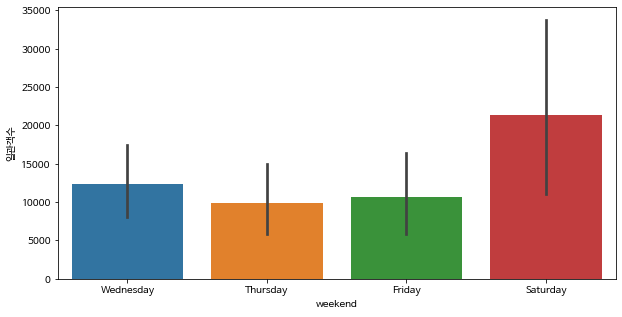

In [ ]:
# seaborn 통해 요일별 관객수 그래프로 도출
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=df['weekend'], y=df['일관객수'], data=df)
plt.xticks(range[7], labels=['월','화','수','목','금','토','일'])